# Predicting Toronto Ferry Activity

In [1]:
from Model import RedemptionModel 
import pandas as pd 

In [2]:
def load_data(file):
    # generic data processing function
    df = pd.read_csv(file,
                dtype={'_id':int, 'Redemption Count': int, 'Sales Count':int},
                parse_dates=['Timestamp'])
    df.sort_values('Timestamp', inplace=True)
    # convert to time-aware
    df.set_index('Timestamp', inplace=True)
    df_daily = df.resample('d').sum()
    # engineer some time features 
    df_daily['monthly'] = df_daily.reset_index().Timestamp.dt.month.values
    df_daily['quarter'] = df_daily.reset_index().Timestamp.dt.quarter.values
    return df_daily

In [3]:
df = load_data('./data/Toronto Island Ferry Ticket Counts.csv')

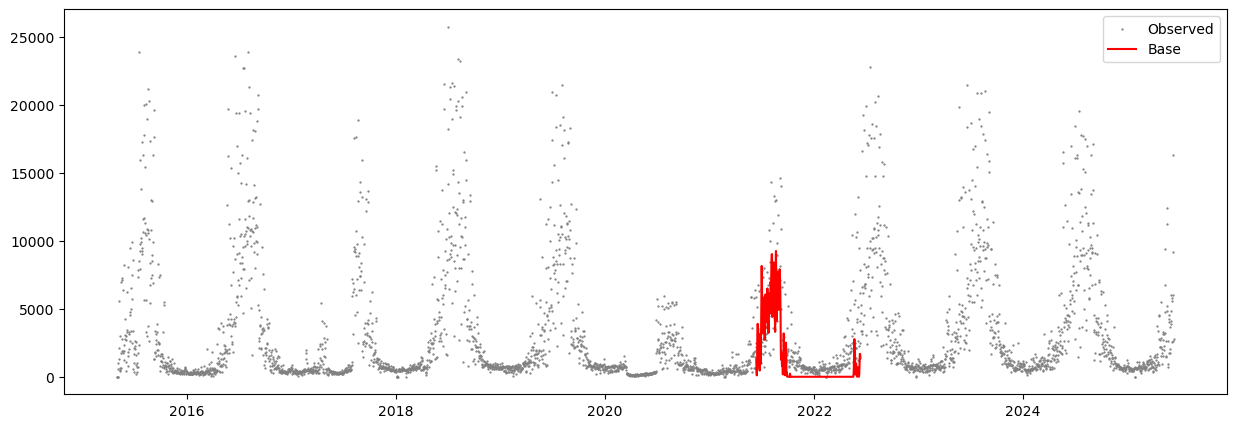

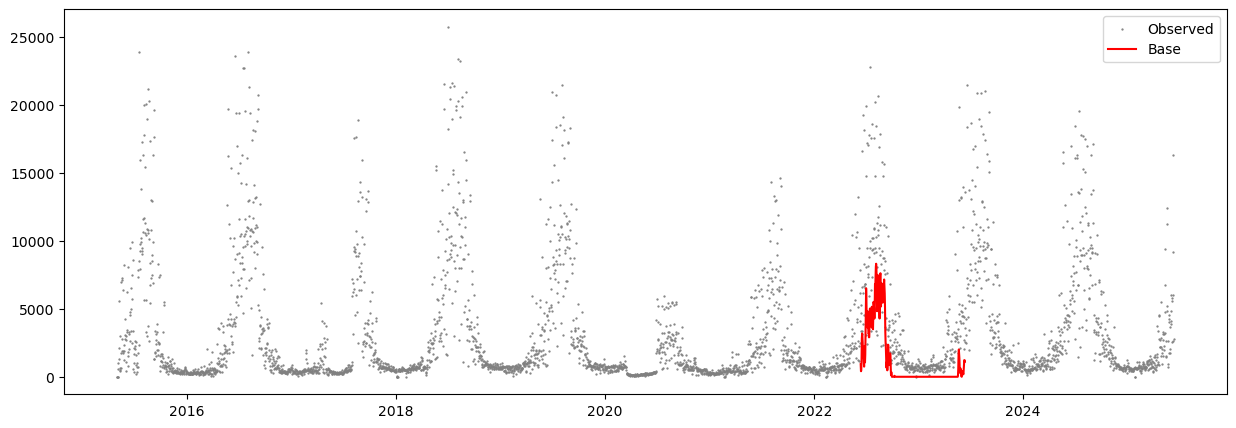

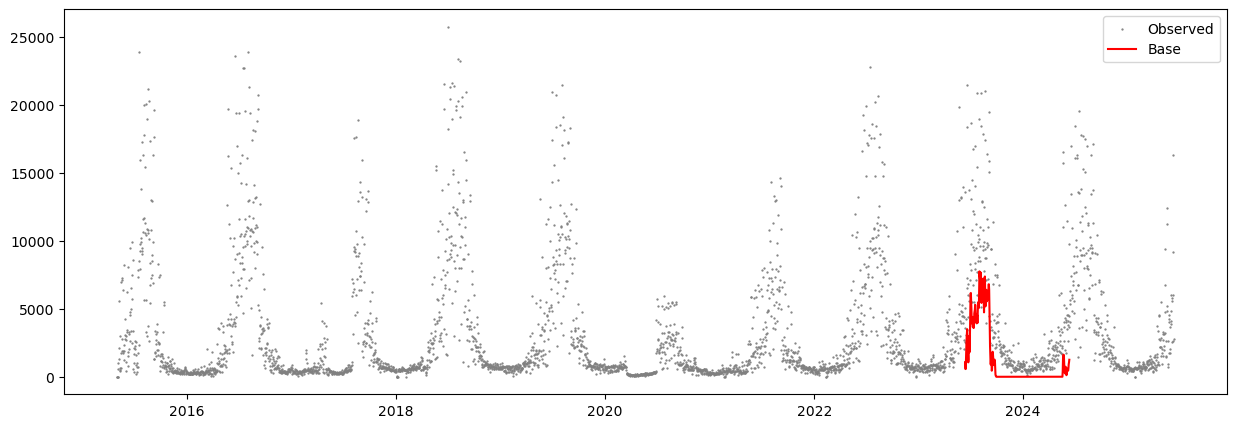

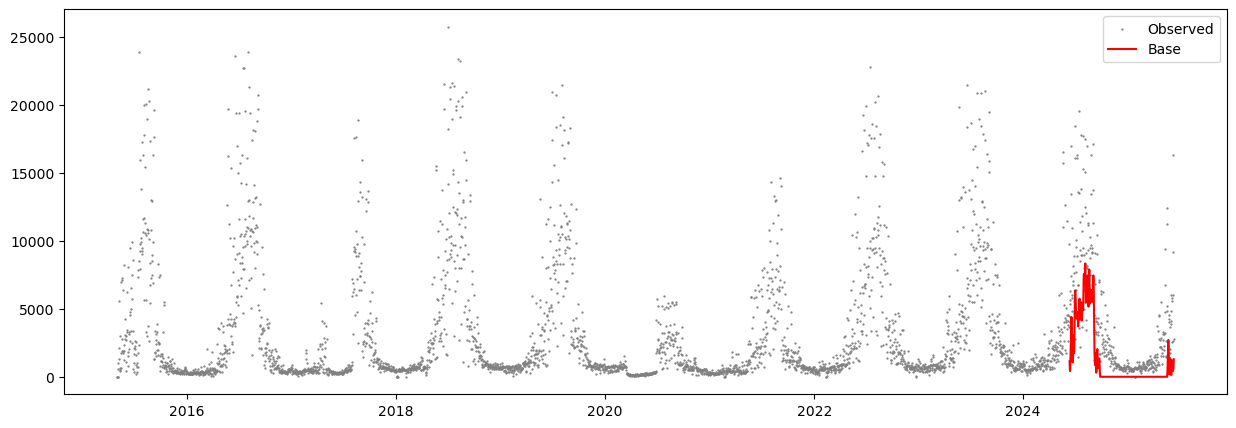

In [4]:
rm = RedemptionModel(df, 'Redemption Count')
rm.run_models()

In [6]:
# print model summary stats
rm.results

{'Base': {0: 0.8920778658859551,
  1: 0.8537013251765558,
  2: 0.8490193459094149,
  3: 0.8580753660015538}}